In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, transform
import os
import open3d as o3d
import torch
import h5py
from io import StringIO

In [17]:
curname = '1484755_1500157'

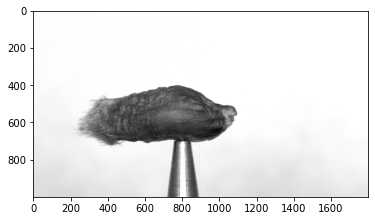

In [3]:
plt.imshow(img, cmap='gray')

In [4]:
y_n = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/Y_N_500.csv', delimiter=',')

In [5]:
bX = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/bX_500.csv', delimiter = ',')

In [6]:
y_n2 = y_n[:500,:]

In [7]:
y_n2.shape

(500, 441)

In [8]:
dirs = bX[:2,:]

In [9]:
dirs.shape

(2, 500)

In [10]:
dirs = dirs.transpose()

In [11]:
import h5py

In [12]:
mainpath = 'C:/cherepashkin1/phenoseed_csv/'
F_Nw = np.array(h5py.File(os.path.join(
    mainpath, '598csv9_F_N.h5').replace('\\', '/'),
        'r').get('dataset'))

In [13]:
F_Nw.shape

(5270, 441)

In [14]:
with open(os.path.join(mainpath,'598csv9_F_N_file_names.txt'),'r') as f:
    F_N_names = f.readlines()
F_N_names = [c.replace('\n','') for c in F_N_names]

In [ ]:
a_list.index(2)

In [15]:
1484734/1494103

0.993729347976679

In [18]:
F_N = F_Nw[[i for i, s in enumerate(F_N_names) if curname in s][0],:]

In [ ]:
indices.append([i for i, s in\
 enumerate(F_N_names) if path in s][0])

In [19]:
cbs = 1

In [20]:
iscuda = False
y_n2 = torch.unsqueeze(torch.Tensor(y_n2), axis=0)
dirs = torch.unsqueeze(torch.Tensor(dirs), axis=0)
F_N = torch.unsqueeze(torch.Tensor(F_N), axis =0)
print(F_N.shape)


torch.Size([1, 441])


In [21]:
def f2p(y_n, f_n, dirs, nsp, vox2mm):
    p = torch.zeros(\
        y_n.shape[0],3,nsp)
    p = p.cuda() if iscuda else p
    for i in range(y_n.shape[0]):
        print(y_n[i].shape,f_n[i].shape )
        far = torch.matmul(y_n[i], f_n[i])
        p[i,0,:]=far*torch.cos(dirs[i,:,0])*\
            torch.sin(dirs[i,:,1])
        p[i,1,:]=far*torch.sin(dirs[i,:,0])*\
            torch.sin(dirs[i,:,1])
        p[i,2,:]=far*torch.cos(dirs[i,:,1])
    p *= vox2mm
    return p

In [22]:
nsp = 500

In [23]:
p = f2p(y_n2, F_N, dirs, nsp, 0.05)

torch.Size([500, 441]) torch.Size([441])


In [24]:
p.shape

torch.Size([1, 3, 500])

In [25]:
p1 = np.squeeze(p.detach().numpy())

In [26]:
p1.shape

(3, 500)

In [27]:
def prmatread(path):
    with open(path, 'r') as f:
        prmatext = f.readlines()
    pr2 = [prmatext[i].replace('[','').replace(']','').replace(';','') for i in range(len(prmatext))]
    pr3 = ''
    for i in pr2:
        pr3+=i
    pr4 = np.genfromtxt(StringIO(pr3), delimiter=',')
    return pr4

In [28]:
prmat = prmatread('C:/cherepashkin1/phenoseed/598/1484755/1500157_ProjectionMatrices.txt')


In [38]:
prmat.shape

(144, 4)

In [30]:
angle = 6

In [37]:
p2 = np.asarray(o3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484755/1500157_Surface.ply').points)


In [41]:
prmat[:4,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8757331e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [ ]:
for angle in range(36):
#     angle = 6
    img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484755/1500157/rotation_'+str(10*angle).zfill(3)+'.tif'))
    prmat00 = prmat[angle*4:(angle+1)*4,:]
    prmat00 = prmat00.transpose()
    # pcd = p2.transpose()
    # pcd = pcd.transpose()
    pcd = p2
    pcd0 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
        pcd.shape[0]), axis = 1)), axis=1)
    print('pcd0 shape = ', pcd0.shape)
    pcd1 = np.matmul(pcd0,prmat00)
    pcd2 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
    # vox2mm = 1
    pcd3 = pcd2 - np.mean(pcd2,axis=0)
    pcd3 = pcd3.transpose()
    # print(pcd3.shape)
    # pcd3 = pcd3[:,::4]
    # print(pcd3[:2,:].shape)
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(pcd3[0,:],-pcd3[1,:], s=10)
    sz = 400
    ax.set_xlim([-sz,sz])
    ax.set_ylim([-sz,sz])    
    _ = ax.axis('off')
    ax = fig.add_subplot(1, 2, 2)
    # print('shape img = ', img.shape)
    # print('img stat=', getstat(img))
    ax.imshow(img, cmap='gray')
    # ax.imshow(np.max(img)-img, cmap='Greys')
    _ = ax.axis('off')
    plt.savefig('./backproject/'+str(angle)+'.png')

In [60]:
import torch
import torch.optim as optim

optimizer = optim.SGD([torch.rand((2,2), requires_grad=True)], lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
for epoch in range(1, 21):
    scheduler.step()
    print('Epoch-{0} lr: {1}'.format(epoch, optimizer.param_groups[0]['lr']))
    if epoch % 5 == 0:print()

Epoch-1 lr: 0.1
Epoch-2 lr: 0.1
Epoch-3 lr: 0.1
Epoch-4 lr: 0.1
Epoch-5 lr: 0.010000000000000002

Epoch-6 lr: 0.010000000000000002
Epoch-7 lr: 0.010000000000000002
Epoch-8 lr: 0.010000000000000002
Epoch-9 lr: 0.010000000000000002
Epoch-10 lr: 0.0010000000000000002

Epoch-11 lr: 0.0010000000000000002
Epoch-12 lr: 0.0010000000000000002
Epoch-13 lr: 0.0010000000000000002
Epoch-14 lr: 0.0010000000000000002
Epoch-15 lr: 0.00010000000000000003

Epoch-16 lr: 0.00010000000000000003
Epoch-17 lr: 0.00010000000000000003
Epoch-18 lr: 0.00010000000000000003
Epoch-19 lr: 0.00010000000000000003
Epoch-20 lr: 1.0000000000000004e-05



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\cherepashkin1\\phenoseed\\598\\1484755\\1500157\\rotation_006.tif'

pcd0 shape =  (29761, 4)


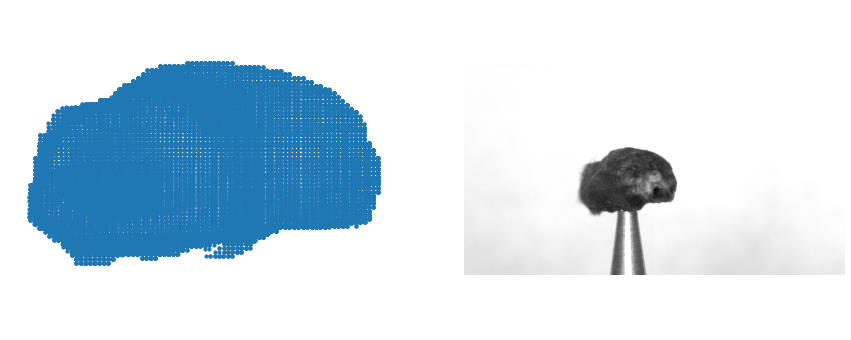

In [52]:
angle = 0
# img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484755/'\
#                            '1500157/'\
#             'rotation_'+str(angle).zfill(3)+'.tif'))
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484755/1500157/rotation_'+str(angle).zfill(3)+'.tif'))
p2 = np.asarray(o3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484755/1500157_Surface.ply').points)
prmat00 = prmat[angle*4:(angle+1)*4,:]
prmat00 = prmat00.transpose()
pcd = p2.transpose()
pcd = pcd.transpose()
pcd0 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
print('pcd0 shape = ', pcd0.shape)
pcd1 = np.matmul(pcd0,prmat00)
pcd2 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
# vox2mm = 1
pcd3 = pcd2 - np.mean(pcd2,axis=0)
pcd3 = pcd3.transpose()
# print(pcd3.shape)
# pcd3 = pcd3[:,::4]
# print(pcd3[:2,:].shape)
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(pcd3[0,:],-pcd3[1,:], s=10)
sz = 250
ax.set_xlim([-sz,sz])
ax.set_ylim([-sz,sz])
_ = ax.axis('off')
ax = fig.add_subplot(1, 2, 2)
# print('shape img = ', img.shape)
# print('img stat=', getstat(img))
ax.imshow(img, cmap='gray')
# ax.imshow(np.max(img)-img, cmap='Greys')
_ = ax.axis('off')

In [51]:
p2 = np.asarray(o3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484755/1500157_Surface.ply').points)


In [ ]:
pcd3 = o3d.geometry.PointCloud()
pcd3.points = o3d.utility.Vector3dVector(p2)
o3d.visualization.draw_geometries([pcd3])

In [25]:
p.shape

torch.Size([1, 3, 500])

In [26]:
p1 = torch.squeeze(p)

In [27]:
p1.shape

torch.Size([3, 500])

In [28]:
p1 = p1.numpy()

In [29]:
p1.shape

(3, 500)

In [32]:
def showpoints(p0,p1=None,p2=None,p3=None):
    vox2mm = 0.05
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(1, 1, 0+1, projection='3d')
    # p0 = np.reshape(ot0,(3,500))
    # p1 = np.reshape(gt0,(3,500))
    #p3 - blue - model output from output folder
    #p2 - red - original pcd
    #p - green - model output from loaded model
    
    ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
    if p1 is not None:    
        ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
    if p2 is not None:    
        ax.scatter(p2[0,:],p2[1,:],p2[2,:], marker='o', s=10, c="b", alpha=0.6)
    # ax.scatter(p3[0,:],p3[1,:],p3[2,:], marker='o', s=10, c="b", alpha=0.6)
    # ax.scatter(p2[0,:],p2[1,:],p2[2,:], marker='o', s=10, c="r", alpha=0.6)
    # ax.scatter(p[0,:],p[1,:],p[2,:], marker='o', s=10, c="g", alpha=0.6)
    ax.view_init(elev=35, azim=25)
    ax_lim = 60*vox2mm
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    plt.show()

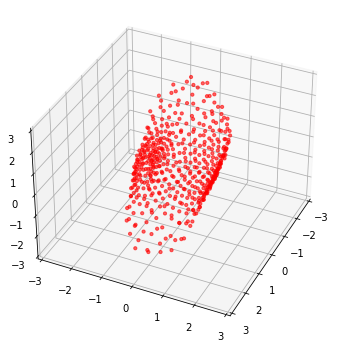

In [33]:
showpoints(p1)

In [30]:
ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
if p1 is not None:
    ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
ax.view_init(elev=el, azim=az)
ax_lim = 120*vox2mm
ax.set_xlim(-ax_lim, ax_lim)
ax.set_ylim(-ax_lim, ax_lim)
ax.set_zlim(-ax_lim, ax_lim)

NameError: name 'ax' is not defined

In [ ]:
dirs = torch.transpose(dirs, 1, 2)

In [ ]:
dirs.shape

In [ ]:
import torch

In [ ]:
y_n = torch.Tensor(y_n)

In [ ]:
nsp = 500
y_n2_one = torch.unsqueeze(y_n[:nsp,:], axis=0)
# y_n2_one = torch.Tensor(y_n2_one).cuda() if iscuda else\
#     torch.Tensor(y_n2_one)
# dirs = torch.Tensor(dirs).cuda() if iscuda else torch.Tensor(dirs)
y_n2 = y_n2_one.repeat(3*2, 1, 1)

In [ ]:
y_n2.shape

In [ ]:
y_n.shape

In [ ]:
y_n2[:3].shape

In [ ]:
y_n2.shape

In [ ]:
pcd = p1

pcd0 shape =  (500, 4)


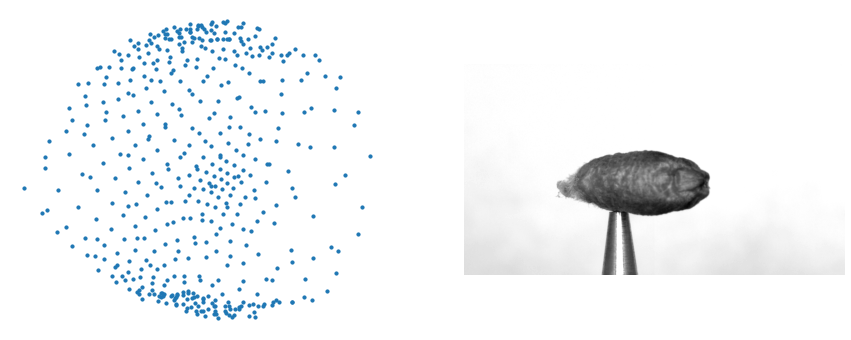

In [100]:
p1.shape

(3, 500)

In [36]:
pcd3 = o3d.geometry.PointCloud()
pcd3.points = o3d.utility.Vector3dVector(p1.transpose())
o3d.visualization.draw_geometries([pcd3])

In [40]:
pcd3 = o3d.geometry.PointCloud()
pcd3.points = o3d.utility.Vector3dVector(p2)
o3d.visualization.draw_geometries([pcd3])

In [101]:
print(prmat00

array([[ 7.4039063e+02,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  7.4039063e+02,  0.0000000e+00,  0.0000000e+00],
       [-4.5703125e+01, -2.7218750e+01, -5.0781250e-02, -5.0781250e-02],
       [-1.8280709e+05, -9.9071000e+04, -1.2100000e+02, -1.2100000e+02]])

In [105]:
prmat00 = prmat[:4,:]

[[ 7.4039063e+02  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  7.4039063e+02  0.0000000e+00  0.0000000e+00]
 [-4.5703125e+01 -2.7218750e+01 -5.0781250e-02 -5.0781250e-02]
 [-1.8250942e+05 -9.8688500e+04 -1.2100000e+02 -1.2100000e+02]]
pcd0 shape =  (31906, 4)


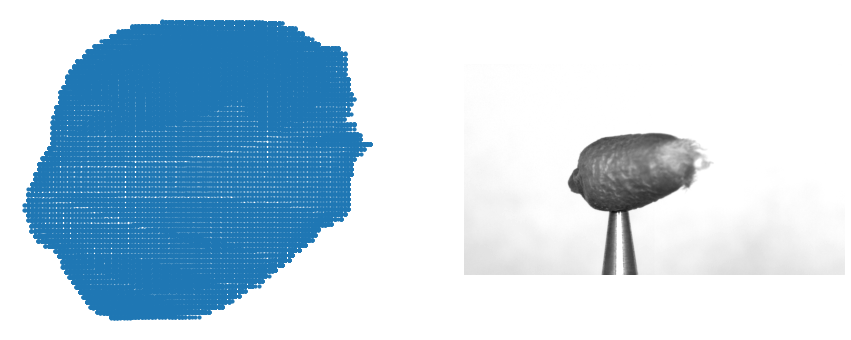

In [66]:
idx = '110'
pr = prmatread('C:/cherepashkin1/phenoseed/598/1484734/1494'+idx+'_ProjectionMatrices.txt')
prmat00 = pr[:4,:].transpose()

# prmat00[:,3] = [0,0,0,0]
print(prmat00)
img = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484734/1494'+idx+'/rotation_000.tif'))
p2 = np.asarray(o3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484734/1494'+idx+'_Surface.ply').points)
# print(prmat00)
# prmat00 = prmat0
# prmat00 = prmat00.transpose()
# pcd = pcd.transpose()
# pcd = p1.transpose()
# p1 = 
pcd = p2
pcd0 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
print('pcd0 shape = ', pcd0.shape)
pcd1 = np.matmul(pcd0,prmat00)
pcd2 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
# vox2mm = 1
pcd3 = pcd2 - np.mean(pcd2,axis=0)
pcd3 = pcd3.transpose()
# print(pcd3.shape)
# pcd3 = pcd3[:,::4]
# print(pcd3[:2,:].shape)
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(pcd3[0,:],-pcd3[1,:], s=10)
_ = ax.axis('off')
ax = fig.add_subplot(1, 2, 2)
# print('shape img = ', img.shape)
# print('img stat=', getstat(img))
ax.imshow(img, cmap='gray')
# ax.imshow(np.max(img)-img, cmap='Greys')
_ = ax.axis('off')

In [148]:
pr.shape

(144, 4)

In [138]:
pr2 = np.genfromtxt('prmat.txt',delimiter=',')

In [139]:
pr2.shape

(144, 4)

In [140]:
pr2[:4,:]

array([[ 7.4039063e+02,  0.0000000e+00, -4.5703125e+01, -1.8251056e+05],
       [ 0.0000000e+00,  7.4039063e+02, -2.7218750e+01, -9.8688500e+04],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02],
       [ 0.0000000e+00,  0.0000000e+00, -5.0781250e-02, -1.2100000e+02]])

In [ ]:
with open('example.txt','r') as f:
    text = f.readlines()

In [77]:
ex = np.genfromtxt('example.txt',delimiter=',')

In [78]:
ex

array([[ 3.53553e+02,  3.39645e+02,  2.77744e+02, -1.44946e+06],
       [-1.03528e+02,  2.33212e+01,  4.59607e+02, -6.32525e+05],
       [ 7.07107e-01, -3.53553e-01,  6.12372e-01, -9.18559e+02]])

In [79]:
ex1 = np.zeros([4,4])

In [80]:
ex1[:3,:] = ex

In [98]:
ex1[3,:] = [0,0,0,1]

In [99]:
ex1

array([[ 3.53553e+02,  3.39645e+02,  2.77744e+02, -1.44946e+06],
       [-1.03528e+02,  2.33212e+01,  4.59607e+02, -6.32525e+05],
       [ 7.07107e-01, -3.53553e-01,  6.12372e-01, -9.18559e+02],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00]])

In [85]:
from numpy import linalg

In [94]:
ex1[1:,:3].shape

(3, 3)

In [100]:
linalg.det(ex1[1:,:3])

0.0

In [2]:
gt = np.genfromtxt('C:/cherepashkin1/598test/plot_output/e058/000/gt_train', delimiter=',')

In [5]:
gt.shape

(1500,)

In [3]:
gt0 = gt[0]

In [4]:
gt0.shape

()

In [6]:
gt1 = gt.reshape(3,500)

In [7]:
img = np.genfromtxt('C:/cherepashkin1/598test/plot_output/e058/000/input_image_train', delimiter=',')

In [56]:
import imageio

In [60]:
img2 = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484755/1500157/rotation_000.tif'), dtype=np.single)

In [ ]:
gt2 = 1484755/1500157

In [13]:
def backproject(prmat, img, pcd, dirname):
    # img0 = np.asarray(io.imread('D:/cherepashkin1/phenoseed/598/1484717/1491988/rotation_000.tif'))
    pcd = pcd.transpose()
    # print(pcd.shape)
    pcd0 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
        pcd.shape[0]), axis = 1)), axis=1)
    # print('pcd0 shape = ', pcd0.shape)
    # print(pcd0.shape)
    if False:
        prmat00 = prmat
        pcd1 = np.matmul(pcd0,prmat00)
    else:
        pcd1 = pcd0
    pcd2 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
    # vox2mm = 1
    pcd3 = pcd2 - np.mean(pcd2,axis=0)
    pcd3 = pcd3.transpose()
    # print(pcd3.shape)
    # pcd3 = pcd3[:,::4]
    # print(pcd3[:2,:].shape)
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(pcd3[0,:],-pcd3[1,:], s=10)
    sz = 60
    ax.set_xlim([-sz,sz])
    ax.set_ylim([-sz,sz])
    _ = ax.axis('off')
    ax = fig.add_subplot(1, 2, 2)
    # print('shape img = ', img.shape)
#     print('img stat=', getstat(img))
    ax.imshow(img, cmap='gray')
    # ax.imshow(np.max(img)-img, cmap='Greys')
    _ = ax.axis('off')
#     plt.savefig(dirname+'_back_projection.png')
#     plt.close(fig)

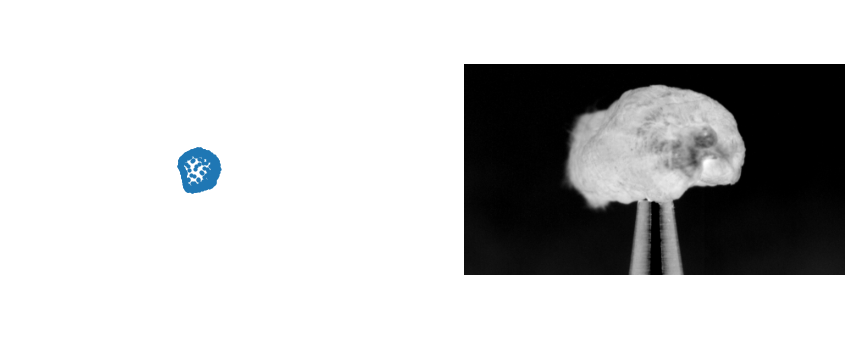

In [15]:
backproject(None, img, 5*gt1, None)

In [16]:
mainpath = 'C:/cherepashkin1/phenoseed_csv/'
F_Nw = np.array(h5py.File(os.path.join(
    mainpath, '598csv9_F_N.h5').replace('\\', '/'),
        'r').get('dataset'))

In [17]:
F_N = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/598csv11/1484755/1500157_F_N.csv', delimiter=',')

In [19]:
Y_N = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/Y_N_500.csv', delimiter=',')

In [23]:
Y_N2 = Y_N[:500,:]

In [22]:
bX = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/bX_500.csv', delimiter=',')

In [26]:
dirs = bX[:2,:]

In [24]:
Y_N2.shape

(500, 441)

In [25]:
bX.shape

(72, 500)

In [18]:
F_N.shape

(441,)

In [29]:
def fn2p(y_n, f_n, dirs, nsp, vox2mm):
    iscuda = False
    p = torch.zeros(\
        y_n.shape[0],3,nsp)
    p = p.cuda() if iscuda else p
    for i in range(y_n.shape[0]):
        far = torch.matmul(y_n[i], f_n[i])
        p[i,0,:]=far*torch.cos(dirs[i,:,0])*\
            torch.sin(dirs[i,:,1])
        p[i,1,:]=far*torch.sin(dirs[i,:,0])*\
            torch.sin(dirs[i,:,1])
        p[i,2,:]=far*torch.cos(dirs[i,:,1])
    p *= vox2mm
    return p

In [33]:
dirs.shape

(2, 500)

In [36]:
p = fn2p( torch.unsqueeze(torch.Tensor(Y_N2), axis=0), torch.unsqueeze(torch.Tensor(F_N), axis=0), torch.unsqueeze(torch.transpose(torch.Tensor(dirs), 0, 1), axis=0), 500, 0.05)

In [37]:
p.shape

torch.Size([1, 3, 500])

In [38]:
p0 = p[0]

In [65]:
import open3d

In [149]:
pcdd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484755/1500157_Surface.ply').points)

In [118]:
p2.shape

torch.Size([1, 3, 500])

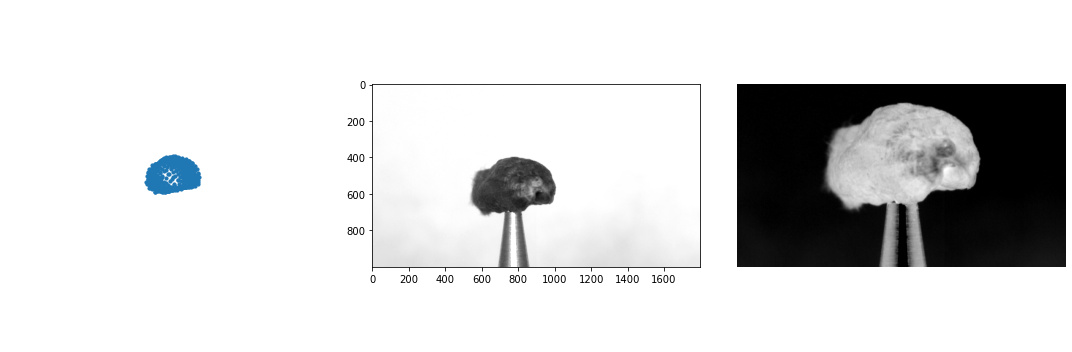

In [119]:
pcd = p2[0].numpy().transpose()*5
#pcd = pcdd
# pcd = pcd.transpose()
# print(pcd.shape)
pcd0 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
    pcd.shape[0]), axis = 1)), axis=1)
# print('pcd0 shape = ', pcd0.shape)
# print(pcd0.shape)
if False:
    prmat00 = prmat
    pcd1 = np.matmul(pcd0,prmat00)
else:
    pcd1 = pcd0
pcd2 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
# vox2mm = 1
pcd3 = pcd2 - np.mean(pcd2,axis=0)
pcd3 = pcd3.transpose()
# print(pcd3.shape)
# pcd3 = pcd3[:,::4]
# print(pcd3[:2,:].shape)
fig = plt.figure(figsize=(15,5))
# f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [1, 1, 3]}, figsize=)
# figsubplot(131, aspect='equal')
ax = fig.add_subplot(1, 3, 1)
ax.scatter(-pcd3[0,:],pcd3[1,:], s=10)
# ax.figheight(15)
sz = 60
ax.set_xlim([-sz,sz])
ax.set_ylim([-sz,sz])
_ = ax.axis('off')
ax = fig.add_subplot(1, 3, 2)
# print('shape img = ', img.shape)
#     print('img stat=', getstat(img))
ax.imshow(img2, cmap='gray')
ax = fig.add_subplot(1, 3, 3)
# print('shape img = ', img.shape)
#     print('img stat=', getstat(img))
ax.imshow(img, cmap='gray')
# ax.imshow(np.max(img)-img, cmap='Greys')
_ = ax.axis('off')
fig.tight_layout()


In [128]:
def homopcd(pcd):
    pcd0 = np.concatenate((pcd, np.expand_dims(np.repeat(1,
        pcd.shape[0]), axis = 1)), axis=1)
    pcd1 = pcd0
    pcd2 = pcd1/np.repeat(np.expand_dims(pcd1[:,3], axis=1), 4, axis = 1)
    pcd3 = pcd2 - np.mean(pcd2,axis=0)
    pcd3 = pcd3.transpose()
    return(pcd3)

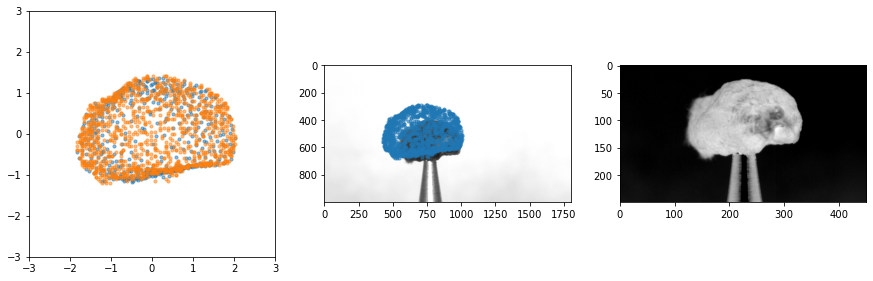

In [148]:
# pcd = p2[0].numpy()*5
pcd = p2[0].numpy().transpose()
# pcd = pcdd*0.05
# pcd = pcd.transpose()
# print(pcd.shape)

# print(pcd3.shape)
# pcd3 = pcd3[:,::4]
# print(pcd3[:2,:].shape)
# fig = plt.figure(figsize=(15,5))
f, (a0, a1, a2) = plt.subplots(1, 3, figsize=(15,5))
# figsubplot(131, aspect='equal')
# ax = fig.add_subplot(1, 3, 1)
p0 = homopcd(p2[0].numpy().transpose())
p1 = homopcd(pcdd[::25,:]*0.05)
a0.scatter(-p0[0,:],p0[1,:], s=10, alpha=0.5)
a0.scatter(-p1[0,:],p1[1,:], s=10, alpha=0.5)
# ax.figheight(15)
sz = 3
a0.set_xlim([-sz,sz])
a0.set_ylim([-sz,sz])
a0.set_aspect('equal', adjustable='box')
# _ = a0.axis('off')
# ax = fig.add_subplot(1, 3, 2)
# print('shape img = ', img.shape)
#     print('img stat=', getstat(img))
a1.imshow(img2, cmap='gray')
p3 = p1*150
a1.scatter(-p3[0,:]+700,-p3[1,:]+500, s=10, alpha=0.5)

# ax = fig.add_subplot(1, 3, 3)
# print('shape img = ', img.shape)
#     print('img stat=', getstat(img))
a2.imshow(img, cmap='gray')
# ax.imshow(np.max(img)-img, cmap='Greys')
# _ = a2.axis('off')
# fig.tight_layout()


In [78]:
fig = plt.figure(figsize=(15,6))
# ax = fig.add_subplot(1, 3, 1)
ax.scatter(-pcd3[0,:],pcd3[1,:], s=10)
sz = 60
ax.set_xlim([-sz,sz])
ax.set_ylim([-sz,sz])
_ = ax.axis('off')

TypeError: cannot unpack non-iterable Figure object

<Figure size 1080x432 with 0 Axes>

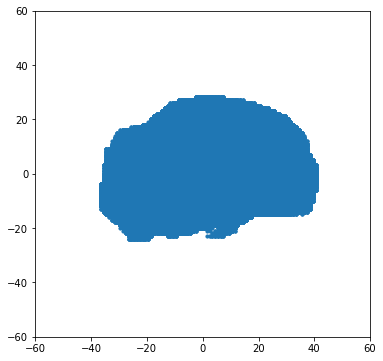

In [106]:
fig = plt.figure(figsize=(6,6))
# ax = fig.add_subplot(1, 3, 1)
plt.scatter(-pcd3[0,:],pcd3[1,:], s=10)
sz = 60
plt.xlim([-sz,sz])
plt.ylim([-sz,sz])
_ = ax.axis('off')

In [42]:
mainpath = 'C:/cherepashkin1/phenoseed_csv/'
F_Nw = np.array(h5py.File(os.path.join(
    mainpath, '598csv9_F_N.h5').replace('\\', '/'),
        'r').get('dataset'))

In [43]:
F_Nw.shape

(5270, 441)

In [44]:
with open(os.path.join(mainpath,'598csv9_F_N_file_names.txt'),'r') as f:
    F_N_names = f.readlines()
F_N_names = [c.replace('\n','') for c in F_N_names]

In [45]:
F_N_names.index('1484755_1500157')

4599

In [46]:
F_N2 = F_Nw[4599]

In [47]:
F_N2.shape

(441,)

In [ ]:
p = np.zeros([3,500])
far = np.matmul(Y_N2, F_N2)
p[i,0,:]=far*torch.cos(dirs[i,:,0])*\
    torch.sin(dirs[i,:,1])
p[i,1,:]=far*torch.sin(dirs[i,:,0])*\
    torch.sin(dirs[i,:,1])
p[i,2,:]=far*torch.cos(dirs[i,:,1])
p *= vox2mm
return p

In [139]:
p2 = fn2p( torch.unsqueeze(torch.Tensor(Y_N2), axis=0), torch.unsqueeze(torch.Tensor(F_N2), axis=0), torch.unsqueeze(torch.transpose(torch.Tensor(dirs), 0, 1), axis=0), 500, 0.05)

In [140]:
p2.shape

torch.Size([1, 3, 500])

In [124]:
p3 = p2[0].numpy()

In [125]:
print(np.min(p3), np.max(p3))

-3.3878052 3.2025821


# Check 058_004

In [ ]:
p2 = fn2p( torch.unsqueeze(torch.Tensor(Y_N2), axis=0), torch.unsqueeze(torch.Tensor(F_N2), axis=0), torch.unsqueeze(torch.transpose(torch.Tensor(dirs), 0, 1), axis=0), 500, 0.05)

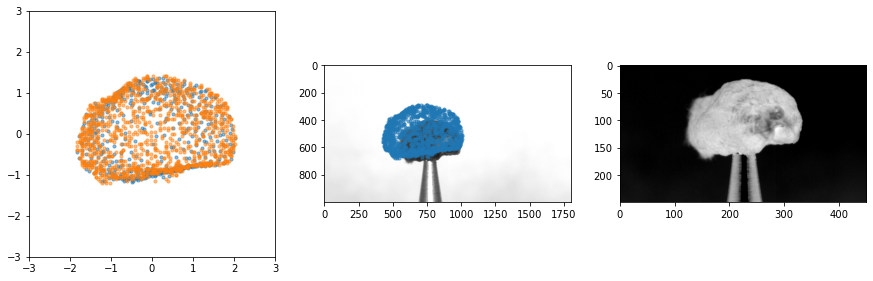

In [148]:
# pcd = p2[0].numpy()*5
pcd = p2[0].numpy().transpose()
# pcd = pcdd*0.05
# pcd = pcd.transpose()
# print(pcd.shape)

# print(pcd3.shape)
# pcd3 = pcd3[:,::4]
# print(pcd3[:2,:].shape)
# fig = plt.figure(figsize=(15,5))
f, (a0, a1, a2) = plt.subplots(1, 3, figsize=(15,5))
# figsubplot(131, aspect='equal')
# ax = fig.add_subplot(1, 3, 1)
p0 = homopcd(p2[0].numpy().transpose())
p1 = homopcd(pcdd[::25,:]*0.05)
a0.scatter(-p0[0,:],p0[1,:], s=10, alpha=0.5)
a0.scatter(-p1[0,:],p1[1,:], s=10, alpha=0.5)
# ax.figheight(15)
sz = 3
a0.set_xlim([-sz,sz])
a0.set_ylim([-sz,sz])
a0.set_aspect('equal', adjustable='box')
# _ = a0.axis('off')
# ax = fig.add_subplot(1, 3, 2)
# print('shape img = ', img.shape)
#     print('img stat=', getstat(img))
a1.imshow(img2, cmap='gray')
p3 = p1*150
a1.scatter(-p3[0,:]+700,-p3[1,:]+500, s=10, alpha=0.5)

# ax = fig.add_subplot(1, 3, 3)
# print('shape img = ', img.shape)
#     print('img stat=', getstat(img))
a2.imshow(img, cmap='gray')
# ax.imshow(np.max(img)-img, cmap='Greys')
# _ = a2.axis('off')
# fig.tight_layout()


In [ ]:
# 